### LinearRegression 클래스 - Ordinary Least Squares 

* CRIM : 지역별 범죄 발생률
* ZN : 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS : 비상업 지역 넓이 비율
* CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우 1, 아니면 0)
* NOX : 일산화질소 농도
* RM : 거주할 주거의 방 개수 
* AGE : 건축된 소유 주택의 연식, 1940년 이전에 건축된 소유주택 
* DIS : 5개 주요 고용센터까지의 가중 거리
* RAD : 고속도로 접근 용이도
* TAX : 10,000달러당 책정된 재산세율
* PTRATIO : 지역의 교사와 학생 수 비율
* B : 지역의 흑인 거주 비율
* LSTAT : 하위 계층의 비율
* MEDV : 본인 소유 주택 가격에서의 중앙값(Median)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
# boston data set 변환

boston_df =pd.DataFrame(boston.data, columns=boston.feature_names)

# boston_df의 y값을 생성한다. 
boston_df['PRICE'] = boston.target
print('boston data shape:', boston_df.shape)
boston_df.head()

boston data shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

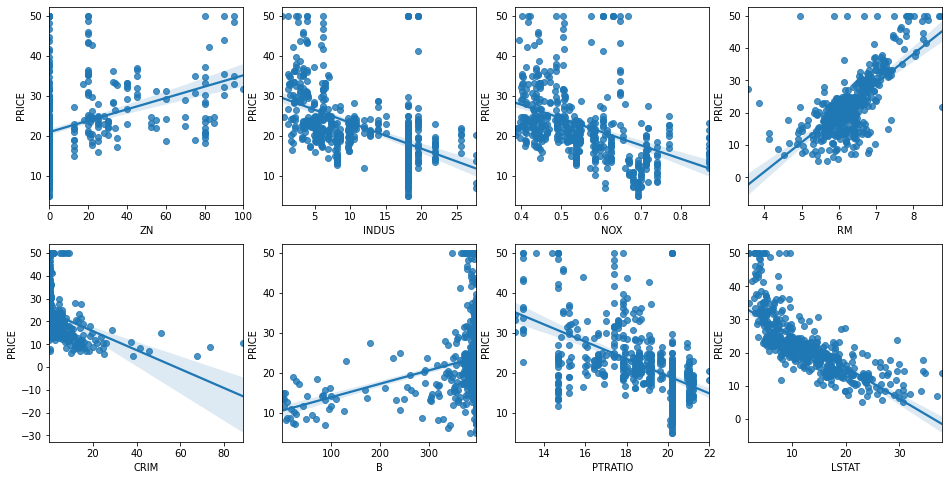

In [5]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['ZN', 'INDUS', 'NOX', 'RM', 'CRIM', 'B', 'PTRATIO', 'LSTAT']

# for i, ftr in enumerate(lm_features):
for i, ftr in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=ftr, y='PRICE', data=boston_df, ax=axs[row,col])

    
# # 위의 for문이 먹히지 않을때 
# # NGD(노가다)기법    

# fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

# sns.regplot(x='RM', y='PRICE', data=bostonDF, ax=axs[0][0])
# sns.regplot(x='ZN', y='PRICE', data=bostonDF,ax=axs[0,1])
# sns.regplot(x='INDUS', y='PRICE', data=bostonDF,ax=axs[0,2])
# sns.regplot(x='NOX', y='PRICE', data=bostonDF,ax=axs[0,3])
# sns.regplot(x='AGE', y='PRICE', data=bostonDF, ax=axs[1,0])
# sns.regplot(x='PTRATIO', y='PRICE', data=bostonDF, ax=axs[1,1])
# sns.regplot(x='LSTAT', y='PRICE', data=bostonDF, ax=axs[1,2])
# sns.regplot(x='RAD', y='PRICE', data=bostonDF, ax=axs[1,3])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_data = boston_df.drop(['PRICE'], axis = 1, inplace=False)
y_target = boston_df['PRICE']

# train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

# 선형회귀 모델로 fit/pred/eval

lr = LinearRegression()
lr.fit(X_train,y_train)

preds_lr = lr.predict(X_test)
mse = mean_squared_error(y_test,preds_lr)
rmse = np.sqrt(mse)

r2_1 = r2_score(y_test,preds_lr)

print('MSE:{0:.4f}, RMSE:{1:.4f}'.format(mse, rmse))
print('R_squared:{0:.4f}'.format(r2_1))

MSE:17.2969, RMSE:4.1590
R_squared:0.7572


In [7]:
# intercept(절편)과 coefficient(계수)값 확인

print('절편 값:', lr.intercept_)
print('계수 값:',np.round(lr.coef_,2))

coef_1 = np.round(lr.coef_,2)

절편 값: 40.995595172164336
계수 값: [-1.10e-01  7.00e-02  3.00e-02  3.05e+00 -1.98e+01  3.35e+00  1.00e-02
 -1.74e+00  3.60e-01 -1.00e-02 -9.20e-01  1.00e-02 -5.70e-01]


In [8]:
# 회귀계수 정렬
coef_seri = pd.Series(data=coef_1, index=X_data.columns)
coef_seri.sort_values()

NOX       -19.80
DIS        -1.74
PTRATIO    -0.92
LSTAT      -0.57
CRIM       -0.11
TAX        -0.01
AGE         0.01
B           0.01
INDUS       0.03
ZN          0.07
RAD         0.36
CHAS        3.05
RM          3.35
dtype: float64

이번에는 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정해보자. 사이킷런은 cross_val_score()를 이용하지만, RMSE를 제공하지 않으므로 MSE 수치결과를 RMSE로 반환해야 한다. cross_val_score()의 인자로 scoring = 'neg_mean_squared_error'를 지정하면 반환되는 수치 값은 음수 값이다. 

사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인데, 일반적으로 회귀는 MSE 값이 낮을수록 좋은 회귀 모델이다.

In [9]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1)
linear_reg = LinearRegression()

# cross_val_score()로 5폴드 set
# MSE를 구한 뒤
# 이를 기반으로 RMSE

neg_mse_scores = cross_val_score(linear_reg, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# Negative MSE scores는 전부 다 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE scores:', np.round(avg_rmse,2))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE scores: 5.83


## 다항 회귀를 이용한 과소적합 및 과적합 이해 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS
%matplotlib inline

In [11]:
# 임의의 값으로 구성된 X값에 대해
# 코사인 변환 값을 반환.

def true_func(X):
    return np.cos(1.5* np.pi * X)

# X는 0에서부터 1까지 30개의 임의의 값을
# 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples)) # 0에서부터 시작된 값을 sorting하여
                                       # X값에 할당 or 선언


# y값은 코사인 기반의 true_func 
# 약간의 노이즈 변동을 더했다

y = true_func(X)+ np.random.randn(n_samples) *0.1


Degree 1 회귀 계수는 [-2.] 입니다.

Degree 1 MSE는 0.40772896250986834 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.

Degree 4 MSE는 0.04320874987231747 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.

Degree 15 MSE는 182815433.47648773 입니다.


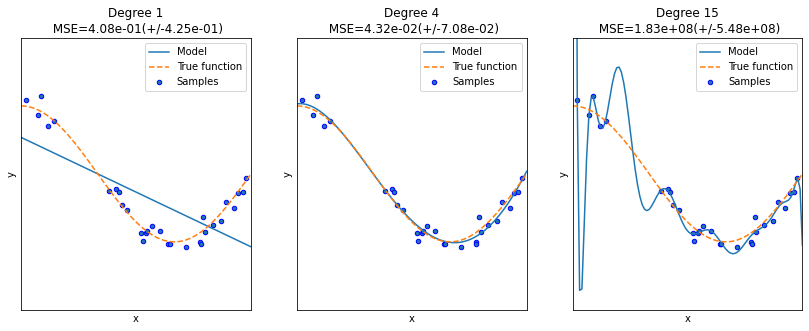

In [12]:
# 다항식 차수를 각각 1, 4, 15로 변경하며 결과비교하기
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키며 비교 
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    #개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression",linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    # 교차 검증으로 다항 회귀를 평가하기
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', 
                             cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('\nDegree {0} MSE는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행 및 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_func(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolors='b', s=20, label="Samples")
    
    plt.xlabel("x");plt.ylabel("y");plt.xlim((0,1));plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title("Degree {}\n MSE={:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

# 릿지 규제(L2규제) vs 라쏘 규제(L1규제)

pred_y = ax + b 

MSE :: np.mean((actual_y - pred_y)^2) + 어떠한 값을 더해줌... 


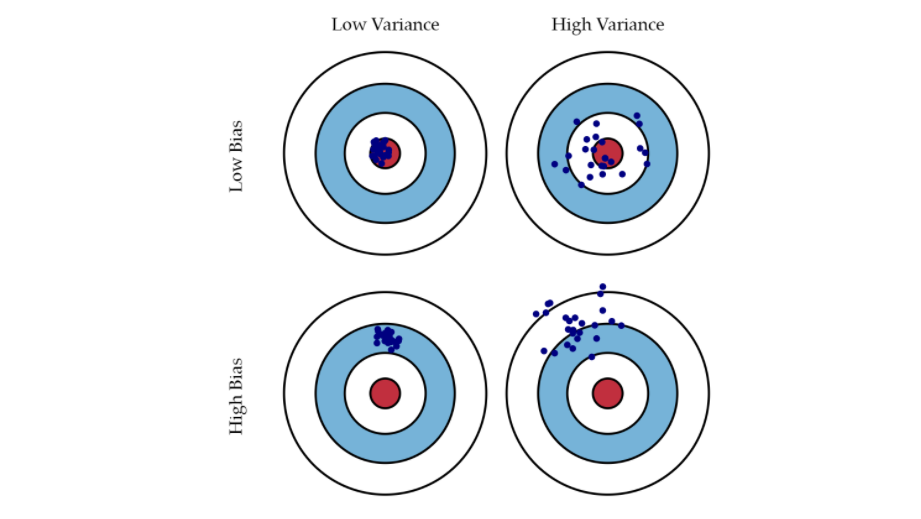

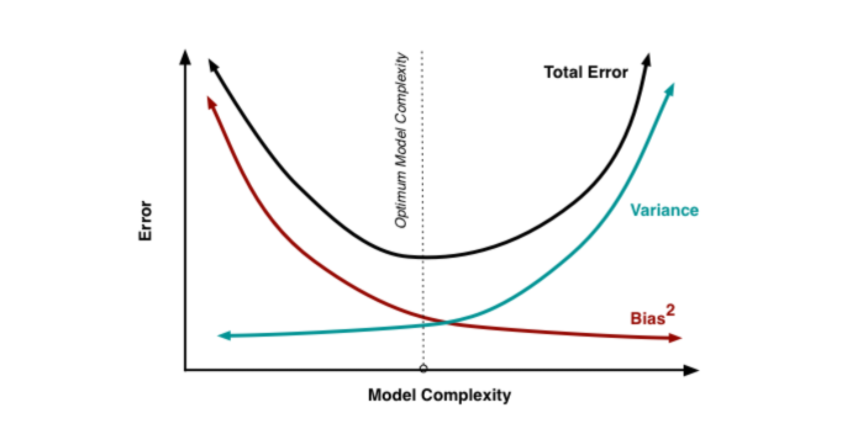 

In [26]:
# 릿지(L2:: 제곱) 코드 구현

y_target = boston_df.PRICE
X_data = boston_df.drop(['PRICE'],axis=1)

# 릿지(L2:: 제곱) 라이브러리 호출

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# 릿지(L2:: 제곱)의 객체 설정

ridge = Ridge(alpha=1)

# cross_val_score를 통한 검증(Validatioon)

neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error',
                                 cv=5) # 음수의 mse가 출력

rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Neg_MSE_scores:', np.round(neg_mse_scores,3))
print('5 folds 의 개별 RMSE_scores:', np.round(rmse_scores,3))
print('5 folds 의 평균 RMSE_scores:', np.round(avg_rmse,3))


5 folds 의 개별 Neg_MSE_scores: [-11.711 -23.583 -29.693 -80.23  -31.116]
5 folds 의 개별 RMSE_scores: [3.422 4.856 5.449 8.957 5.578]
5 folds 의 평균 RMSE_scores: 5.653


In [27]:
# 이번에는 릿지의 alpha값을
# 0,0.1,1,10,100,1000

alphas = [0,0.1,1,10,100,1000]

# alphas list 값을 반복하며
# alpha에 따른 평균 rmse를 구해보자.
for apa in alphas:
    ridge = Ridge(alpha=apa)
    
    # CV=5를 통한 cross_val_score 활용
    # 평균 rmse를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error',
                                 cv=5) # 음수의 mse가 출력
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha가 {0}일 때의 5folds의 평균 RMSE:{1:.3f}'.format(apa, avg_rmse))

alpha가 0일 때의 5folds의 평균 RMSE:5.829
alpha가 0.1일 때의 5folds의 평균 RMSE:5.788
alpha가 1일 때의 5folds의 평균 RMSE:5.653
alpha가 10일 때의 5folds의 평균 RMSE:5.518
alpha가 100일 때의 5folds의 평균 RMSE:5.330
alpha가 1000일 때의 5folds의 평균 RMSE:5.598


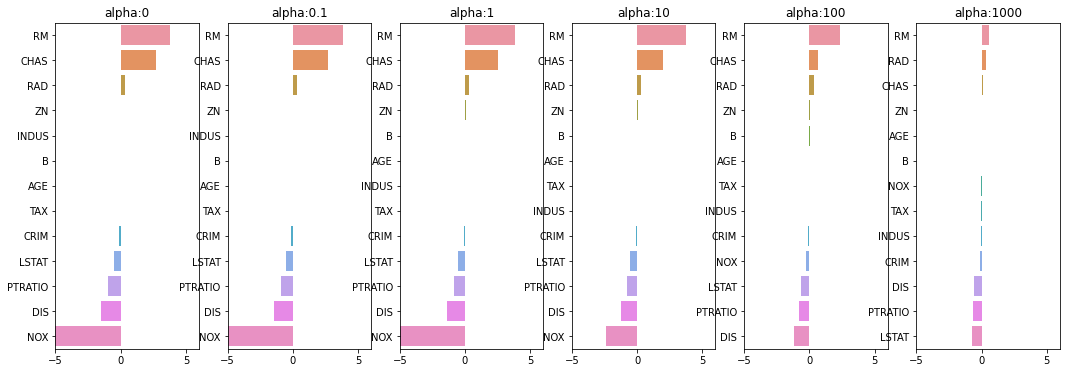

In [31]:
## 각 alpha에 따른 coef값을 시각화
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=6)

## 각 alpha에 따른 coef를 담기 위한 df 생성
coef_df = pd.DataFrame()

## alphas 리스트의 값을 차례로 
## coef값을 추출 및 시각화 후 데이터 저장
## pos를 통해 axis의 위치 지정

alphas = [0,0.1,1,10,100,1000]

for pos, apa in enumerate(alphas):
    ridge = Ridge(alpha= apa)
    ridge.fit(X_data, y_target)
    # alpha에 있는 값들을
    # X_feature별로 coef를 Series로 변환
    # 다시 위의 값들을 coef_df(위에서 만든 df에)
    # 할당하자. 
    coef = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(apa)
    coef_df[colname] = coef 
    
    # 가로 barchart를 통해 visualization 
    # coef가 높은 순대로 표현해보자.
    coef = coef.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-5,6)
    sns.barplot(x=coef.values, y=coef.index, ax=axs[pos])

plt.show()

In [39]:
# df를 통한 coef의 변화 확인
ridge_alphas = [0,0.1,1,10,100,1000]
sort_columns = 'alpha:'+str(ridge_alphas[0])
coef_df.sort_values(by=sort_columns,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:1000
RM,3.809865,3.818233,3.854000,3.702272,2.334536,0.568555
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335,0.101449
RAD,0.306049,0.303515,0.290142,0.279596,0.315358,0.310743
ZN,0.046420,0.046572,0.047443,0.049579,0.054496,0.054378
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826,-0.036336
B,0.009312,0.009368,0.009673,0.010037,0.009393,0.007990
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212,0.030573
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856,-0.016602
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202,-0.090768
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764,-0.763721


In [40]:
# alpha 값이 증가하면서 지속적으로 coef의 값은 감소하지만 ridge:L2의 경우
# 계수값 자체를 0으로 만들지는 않는다.

### 라쏘 회귀

In [76]:
# L1 규제인 alpha 계수

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# alpha값에 따른 회귀 모델의 fold 평균 RMSE를 출력하고 coef들을 
# df로 반환

def linear_model_eval(model_name, params=None, X_data_n=None, y_target_n=None):
    coeff_df = pd.DataFrame()
    print('####', model_name,'####')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        # 위에서 주어진 l1_rati0는 l1규제 즉, Lasso에 대한 비중을 뜻합니다.
        neg_mse = cross_val_score(model,X_data_n,y_target_n,scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse))
        print('alpha :{0}일 때 5folds의 평균 RMSE:{1:.3f}'.format(param,avg_rmse))
        # cross_val_score는 평가지표::(RMSE와 같은...)만을 출력함
        # 따라서 학습을 통한 coeff자체를 출력할 필요가 있음
        model.fit(X_data, y_target)
        # alpha에 따른 X_feature별 coeff을 series로 변환 --> df으로 바꾸어줌
        coeff = pd.Series(data=model.coef_, index= X_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
        
    return coeff_df

# end of linear_model_eval func

In [77]:
?linear_model_eval

In [80]:
# 라쏘에 활용될 alpha값 활용
lasso_alphas = [0.07, 0.1, 0.5, 1, 3, 5]
coef_lasso_df= linear_model_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#### Lasso ####
alpha :0.07일 때 5folds의 평균 RMSE:5.612
alpha :0.1일 때 5folds의 평균 RMSE:5.615
alpha :0.5일 때 5folds의 평균 RMSE:5.669
alpha :1일 때 5folds의 평균 RMSE:5.776
alpha :3일 때 5folds의 평균 RMSE:6.189
alpha :5일 때 5folds의 평균 RMSE:6.375


In [81]:
# coef_lasso_df를 sort한다
coef_lasso_df.sort_values(by='alpha:0.07',ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3,alpha:5
RM,3.789725,3.703202,2.498212,0.949811,0.000000,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864,0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231,0.038467
B,0.010248,0.010249,0.009469,0.008247,0.006510,0.006286
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495,0.031679
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602,-0.007669
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000,-0.000000


### ElasticNet

In [89]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의
# linear_model_eval()함수 적용
# L1_ratio는 0.7로 고정
ela_alphas = [0.07, 0.1, 0.5, 1, 3, 5]
coeff_ela_df = linear_model_eval('ElasticNet', params=ela_alphas,
                                X_data_n= X_data, y_target_n=y_target)

#### ElasticNet ####
alpha :0.07일 때 5folds의 평균 RMSE:5.542
alpha :0.1일 때 5folds의 평균 RMSE:5.526
alpha :0.5일 때 5folds의 평균 RMSE:5.467
alpha :1일 때 5folds의 평균 RMSE:5.597
alpha :3일 때 5folds의 평균 RMSE:6.068
alpha :5일 때 5folds의 평균 RMSE:6.311


In [83]:
# df을 만들어서 다시금 확인
coeff_ela_df.sort_values(by='alpha:0.07', ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3,alpha:5
RM,3.574162,3.414154,1.918419,0.938789,0.000000,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846,0.012039
ZN,0.050107,0.050617,0.052878,0.052136,0.038268,0.041144
B,0.010122,0.010067,0.009114,0.008320,0.007020,0.006531
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446,0.037098
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417,-0.007786
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058,-0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000,0.000000


### 선형회귀 모델을 위한 데이터 변환 

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [85]:
# scale은 표준화(standardization), 정규화(MinMax scaling), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가시 적용, p_degree는 2이상 부여하지 않을 것! (다항식 고차원 =다중공선성 발생)

def data_scaling(scale_method='None', p_degree=None, input_data= None):
    if scale_method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif scale_method =='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif scale_method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data=input_data
        
    if p_degree !=None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                        include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [88]:
# Ridge 클래스의 alpha값을 변화시키면서 피처 데이터 세트를 여러가지 방법으로 변환하여 적용
alphas = [0.1,1,10,100]

#5개 방식으로 변환, 먼저 원본 그대로, 표준정규 분포, 표준정규 분포+다항식 특성
#최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None,None),('Standard',None),('Standard',2),
              ('MinMax', None),('MinMax', 2),('Log',None )]

for scale_method in scale_methods:
    scaled_X_data = data_scaling(scale_method=scale_method[0], p_degree=scale_method[1],
                                input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0],scale_method[1]))
    linear_model_eval('Ridge', params=alphas, X_data_n=scaled_X_data, y_target_n=y_target)


## 변환 유형:None, Polynomial Degree:None
#### Ridge ####
alpha :0.1일 때 5folds의 평균 RMSE:5.788
alpha :1일 때 5folds의 평균 RMSE:5.653
alpha :10일 때 5folds의 평균 RMSE:5.518
alpha :100일 때 5folds의 평균 RMSE:5.330

## 변환 유형:Standard, Polynomial Degree:None
#### Ridge ####
alpha :0.1일 때 5folds의 평균 RMSE:5.826
alpha :1일 때 5folds의 평균 RMSE:5.803
alpha :10일 때 5folds의 평균 RMSE:5.637
alpha :100일 때 5folds의 평균 RMSE:5.421

## 변환 유형:Standard, Polynomial Degree:2
#### Ridge ####
alpha :0.1일 때 5folds의 평균 RMSE:8.827
alpha :1일 때 5folds의 평균 RMSE:6.871
alpha :10일 때 5folds의 평균 RMSE:5.485
alpha :100일 때 5folds의 평균 RMSE:4.634

## 변환 유형:MinMax, Polynomial Degree:None
#### Ridge ####
alpha :0.1일 때 5folds의 평균 RMSE:5.764
alpha :1일 때 5folds의 평균 RMSE:5.465
alpha :10일 때 5folds의 평균 RMSE:5.754
alpha :100일 때 5folds의 평균 RMSE:7.635

## 변환 유형:MinMax, Polynomial Degree:2
#### Ridge ####
alpha :0.1일 때 5folds의 평균 RMSE:5.298
alpha :1일 때 5folds의 평균 RMSE:4.323
alpha :10일 때 5folds의 평균 RMSE:5.185
alpha :100일 때 5folds의 평균 RMSE:6.538

## 변환 유형:Log,